In [3]:
import os
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
images_dir = './data/train'
images = []
for i in os.listdir(images_dir):
    im = Image.open(os.path.join(images_dir, i))
    images.append((im.width, im.height))
len(images)

18259

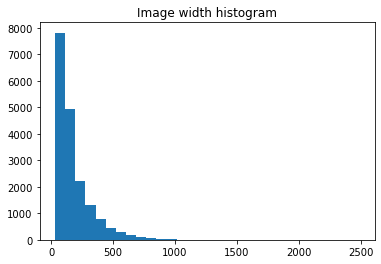

In [10]:
x = [dim[0] for dim in images]
plt.hist(x, bins=30)
plt.title('Image width histogram')
plt.show()

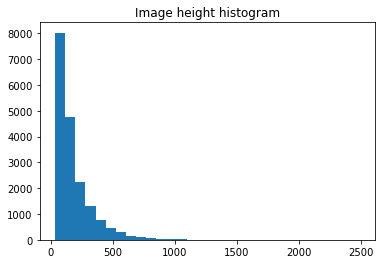

In [12]:
y = [dim[1] for dim in images]
plt.hist(y, bins=30)
plt.title('Image height histogram')
plt.show()

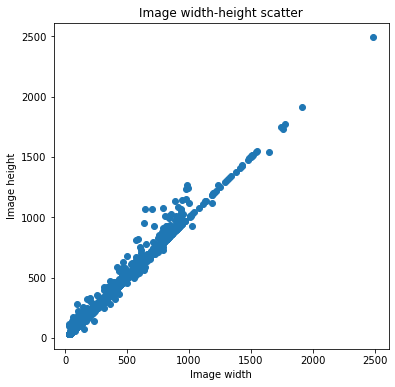

In [18]:
plt.figure(figsize=(6,6))
plt.scatter(x,y)
plt.title('Image width-height scatter')
plt.xlabel('Image width')
plt.ylabel('Image height')
plt.show()

In [22]:
sum(y) / len(y)

180.49548168026726

51 51


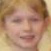

In [58]:
im = Image.open(os.path.join(images_dir, os.listdir(images_dir)[32]))
print(im.width, im.height)
im

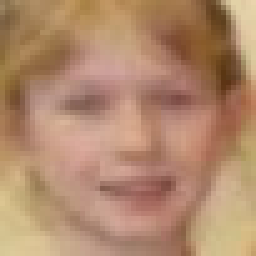

In [59]:
im.resize((256,256), Image.NEAREST)

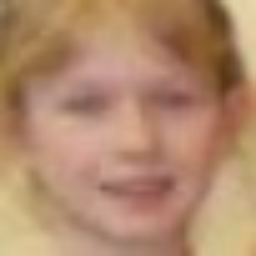

In [60]:
im.resize((256,256), Image.BILINEAR)

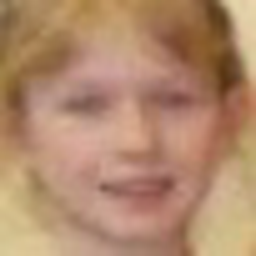

In [61]:
im.resize((256,256), Image.ANTIALIAS)

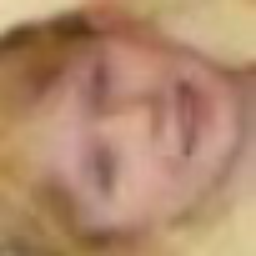

In [63]:
im.resize((256,256), Image.BILINEAR).rotate(90)

In [74]:
import numpy as np

x = np.asanyarray(im)
x

array([[[147, 123,  89],
        [139, 115,  79],
        [152, 126,  89],
        ...,
        [224, 202, 163],
        [230, 208, 169],
        [234, 212, 173]],

       [[155, 131,  97],
        [140, 116,  80],
        [143, 117,  80],
        ...,
        [223, 204, 164],
        [227, 208, 168],
        [230, 211, 169]],

       [[145, 121,  87],
        [131, 105,  72],
        [134, 106,  69],
        ...,
        [226, 207, 167],
        [228, 209, 169],
        [229, 210, 168]],

       ...,

       [[212, 196, 147],
        [213, 197, 148],
        [215, 197, 149],
        ...,
        [219, 186, 132],
        [214, 181, 127],
        [207, 172, 118]],

       [[215, 199, 150],
        [216, 200, 151],
        [218, 200, 152],
        ...,
        [217, 184, 130],
        [210, 177, 123],
        [201, 166, 112]],

       [[215, 199, 150],
        [217, 201, 152],
        [220, 202, 154],
        ...,
        [217, 184, 131],
        [208, 175, 122],
        [196, 160, 108]]

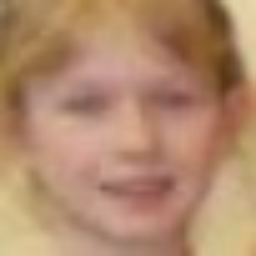

In [93]:
i1 = im.resize((256,256), Image.BILINEAR)
i1

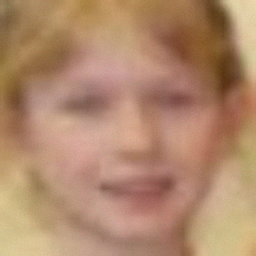

In [97]:
x = np.asanyarray(i1)
_x = x + np.random.standard_normal(x.shape) * 3
i2 = Image.fromarray(np.uint8(_x))
i2

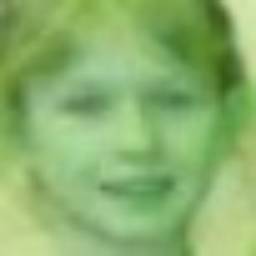

In [115]:
# swapping color channels
d1,d2,d3 = x[:,:,0], x[:,:,1], x[:,:,2]
Image.fromarray(np.stack([d2,d1,d3]).astype(np.uint8).swapaxes(0,1).swapaxes(1,2))

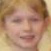

In [124]:
import torch
import torchvision

im = torchvision.utils.Image.open(os.path.join(images_dir, os.listdir(images_dir)[32]))
im

In [127]:
transform = torchvision.transforms.ToTensor()
transform(im).shape

torch.Size([3, 51, 51])

In [129]:
import os
from PIL import Image

train_images_dir = './data/train'

for i in os.listdir(train_images_dir):
    im = Image.open(os.path.join(train_images_dir, i))
    im = im.resize((256,256), Image.BILINEAR)
    im.save(os.path.join('./data/train256', i))

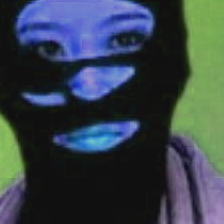

In [39]:
from dataset import MaskImageDataset
from transform import mask_image_transform
from torchvision.transforms import ToPILImage

dataset = MaskImageDataset('./data/train256', transform=mask_image_transform)
x,y = dataset[20]

to_pil = ToPILImage()
to_pil(x)